<a href="https://colab.research.google.com/github/jsalinas1501/upc_data-mining/blob/master/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
### Exploración de los datos

data = pd.read_excel('clean_songs_en_fr_sp.xlsx')
data.head()

,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity
0,"The Messenger - Live from Las Vegas, 2011",Linkin Park,233280,37,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187,en,0.141837,0.752551
1,Cancer,My Chemical Romance,142973,72,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125
2,No Surprises,Radiohead,229120,83,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118,en,-0.036364,0.630303
3,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667
4,Hold On Till May,Pierce The Veil,278586,66,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327,en,0.177059,0.499412


In [ ]:
VARS = ['duration','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
data[VARS]

,duration,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,233280,0.325,0.726000,0.409,0.000013,0.1880,-5.711,0.0295,109.001,0.187
1,142973,0.457,0.358000,0.515,0.000000,0.2780,-4.310,0.0261,74.984,0.222
2,229120,0.255,0.057700,0.393,0.003610,0.1130,-10.654,0.0278,76.426,0.118
3,186480,0.210,0.006020,0.940,0.000000,0.2690,-3.427,0.1230,179.722,0.255
4,278586,0.460,0.000585,0.910,0.001550,0.0735,-3.710,0.0525,73.019,0.327
...,...,...,...,...,...,...,...,...,...,...
782,179293,0.626,0.829000,0.119,0.005290,0.0750,-15.770,0.1190,67.728,0.388
783,261398,0.386,0.941000,0.240,0.000098,0.1000,-11.252,0.0482,77.611,0.241
784,241680,0.518,0.868000,0.389,0.023100,0.7000,-15.120,0.1010,96.466,0.498
785,244453,0.421,0.930000,0.145,0.003200,0.1320,-18.349,0.0649,202.466,0.114


In [ ]:
### Escalamiento de datos
from sklearn.preprocessing import StandardScaler

esc = StandardScaler()
df_escalado = pd.DataFrame(esc.fit_transform(data[VARS]), columns = VARS)
df_escalado.mean()
df_escalado.std()

duration            1.000636
danceability        1.000636
acousticness        1.000636
energy              1.000636
instrumentalness    1.000636
liveness            1.000636
loudness            1.000636
speechiness         1.000636
tempo               1.000636
valence             1.000636
dtype: float64

In [ ]:
### Algoritmo KMeans

from sklearn.cluster import KMeans

modelo_kmeans = KMeans()
modelo_kmeans.fit(df_escalado)

KMeans()

In [ ]:
modelo_kmeans.inertia_

3490.4570622811716

In [ ]:
##### Cómo escoger cuántos clústeres se necesitan
####### Método del codo

inertia_score = []

for i in np.arange(2,11):
  modelo_kmeans = KMeans(n_clusters = i)
  modelo_kmeans.fit(df_escalado)
  inertia_score.append(modelo_kmeans.inertia_)

<Axes: >

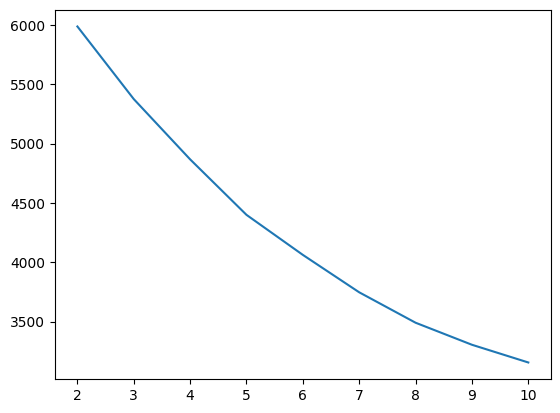

In [ ]:
sns.lineplot(x = np.arange(2,11), y = inertia_score)

In [ ]:
#### Método de silhouette score (buscar el que es más cercano a 1)
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in np.arange(2,11):
  modelo_kmeans = KMeans(n_clusters = i)
  preds = modelo_kmeans.fit_predict(df_escalado)
  score = silhouette_score(df_escalado, preds)
  silhouette_scores.append(score)

<Axes: >

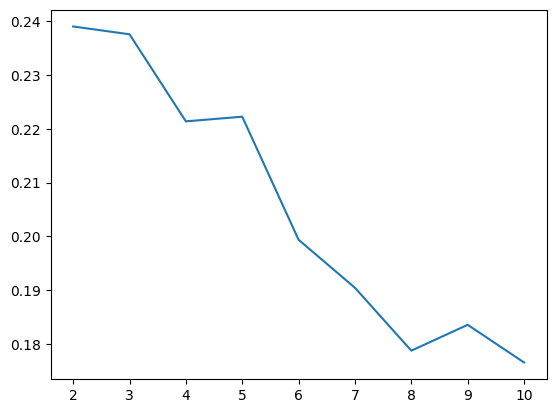

In [ ]:
sns.lineplot(x = np.arange(2,11), y = silhouette_scores)

In [ ]:
### KMeans con 5 clústers

modelo_final_kmeans = KMeans(n_clusters=5)
data['cluster_kmeans'] = modelo_final_kmeans.fit_predict(df_escalado)

In [ ]:
data[data['cluster_kmeans']==4]

,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity,cluster_kmeans
75,I'm Still Standing,Elton John,183440,85,0.504,0.35600,0.904,0.121000,0.1400,-6.863,0.179,176.808,0.772,en,0.165000,0.592976,4
109,The Business,Tiësto,164000,79,0.798,0.41400,0.620,0.019200,0.1120,-7.079,0.232,120.031,0.235,en,-0.058712,0.495833,4
123,Call on Me - Radio Mix,Eric Prydz,171360,77,0.597,0.00427,0.837,0.001150,0.8390,-6.518,0.375,126.342,0.447,en,0.000000,0.300000,4
125,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",DJ Snake,212500,76,0.842,0.15700,0.801,0.000005,0.0642,-4.167,0.228,95.881,0.617,en,-0.268333,0.683333,4
142,Delilah (pull me out of this),Fred again..,250702,71,0.685,0.13800,0.827,0.002070,0.3740,-7.745,0.224,133.930,0.586,en,0.207184,0.710057,4
214,Jazz Cafe,Instrumental Jazz Music Ambient,195555,8,0.567,0.98900,0.120,0.916000,0.1080,-21.429,0.358,215.465,0.677,en,0.304551,0.689499,4
312,"A-Tisket, A-Tasket",Ella Fitzgerald,158786,0,0.642,0.85900,0.388,0.000000,0.2480,-10.000,0.241,165.074,0.767,en,-0.006052,0.289683,4
374,"Hallelujah, I Love Him So",Ella Fitzgerald,155586,0,0.327,0.76500,0.884,0.000001,0.0928,-6.040,0.207,76.822,0.611,en,0.281602,0.497619,4
381,Honeysuckle Rose,Ella Fitzgerald,162053,0,0.711,0.78000,0.378,0.000000,0.1560,-11.213,0.218,94.573,0.864,en,0.490000,0.750000,4
434,Roxanne - Remastered 2003,The Police,191500,0,0.618,0.03840,0.748,0.000004,0.0477,-8.905,0.361,134.001,0.662,en,0.173315,0.367969,4


<Axes: xlabel='cluster_kmeans', ylabel='danceability'>

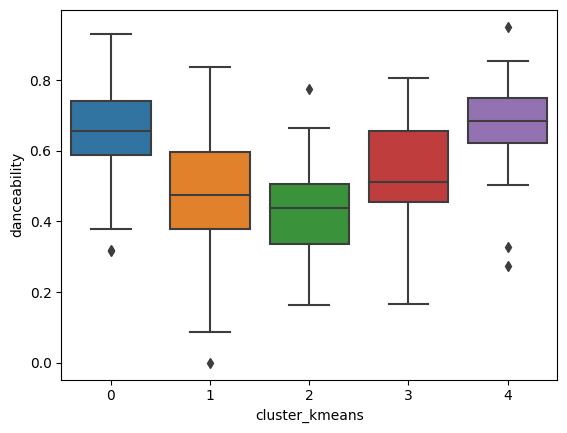

In [ ]:
### Interpretación de los resultados

sns.boxplot(data = data, x = 'cluster_kmeans', y = 'danceability')

<Axes: xlabel='cluster_kmeans', ylabel='energy'>

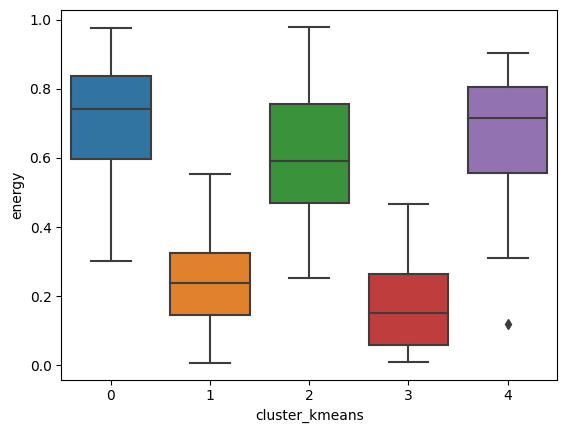

In [ ]:
sns.boxplot(data = data, x = 'cluster_kmeans', y = 'energy')

<Axes: xlabel='cluster_kmeans', ylabel='acousticness'>

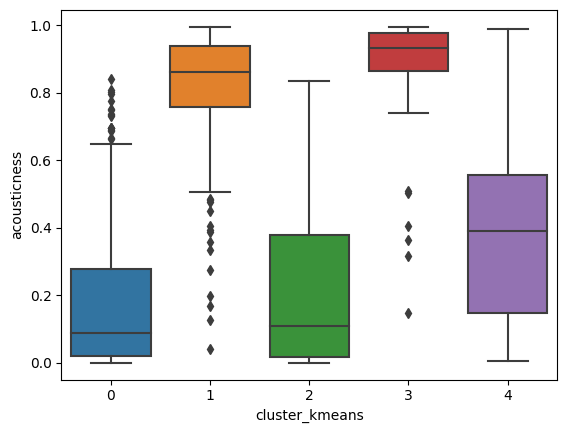

In [ ]:
sns.boxplot(data = data, x = 'cluster_kmeans', y = 'acousticness')

<Axes: xlabel='cluster_kmeans', ylabel='duration'>

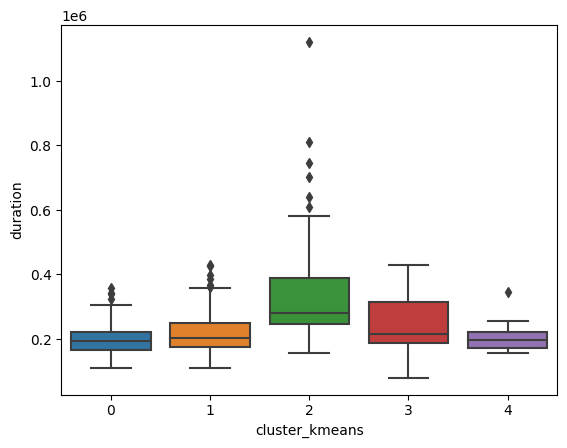

In [ ]:
sns.boxplot(data = data, x = 'cluster_kmeans', y = 'duration')

In [ ]:
### DBScan

from sklearn.cluster import DBSCAN

modelo_dbscan = DBSCAN(eps = 1.5, min_samples = 5)
data['cluster_dbscan'] = modelo_dbscan.fit_predict(df_escalado)
data['cluster_dbscan'].unique()

array([ 0, -1,  3,  2,  1,  4])

In [ ]:
data[data['cluster_dbscan']==-1]

,name,artist,duration,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,language,Polarity,Subjectivity,cluster_kmeans,cluster_dbscan
1,Cancer,My Chemical Romance,142973,72,0.457,0.35800,0.515,0.00000,0.2780,-4.310,0.0261,74.984,0.222,en,-0.067330,0.678125,1,-1
3,I'm Not Okay (I Promise),My Chemical Romance,186480,78,0.210,0.00602,0.940,0.00000,0.2690,-3.427,0.1230,179.722,0.255,en,0.259333,0.536667,2,-1
5,Fake Plastic Trees,Radiohead,290706,73,0.463,0.16700,0.229,0.09970,0.2020,-12.592,0.0297,73.543,0.135,en,-0.023967,0.527273,1,-1
6,How to Disappear Completely,Radiohead,356333,48,0.167,0.31600,0.302,0.79700,0.1100,-11.644,0.0345,102.026,0.190,en,0.106250,0.600000,3,-1
7,Nude,Radiohead,255386,0,0.537,0.83300,0.342,0.60000,0.0856,-9.785,0.0338,128.331,0.156,en,-0.150000,0.250000,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,Jardin d'hiver,Stacey Kent,214053,0,0.789,0.48600,0.141,0.01060,0.2560,-19.975,0.0366,100.110,0.557,fr,0.070833,0.341667,1,-1
770,Jardin d'hiver,Keren Ann,178160,0,0.805,0.79200,0.307,0.61200,0.3730,-14.281,0.0463,115.014,0.547,fr,0.094444,0.355556,3,-1
782,C'Est Si Bon,Halie Loren,179293,0,0.626,0.82900,0.119,0.00529,0.0750,-15.770,0.1190,67.728,0.388,fr,0.196559,0.667744,1,-1
784,Ces petits riens - Live,Stacey Kent,241680,0,0.518,0.86800,0.389,0.02310,0.7000,-15.120,0.1010,96.466,0.498,fr,0.000000,0.300000,1,-1


4


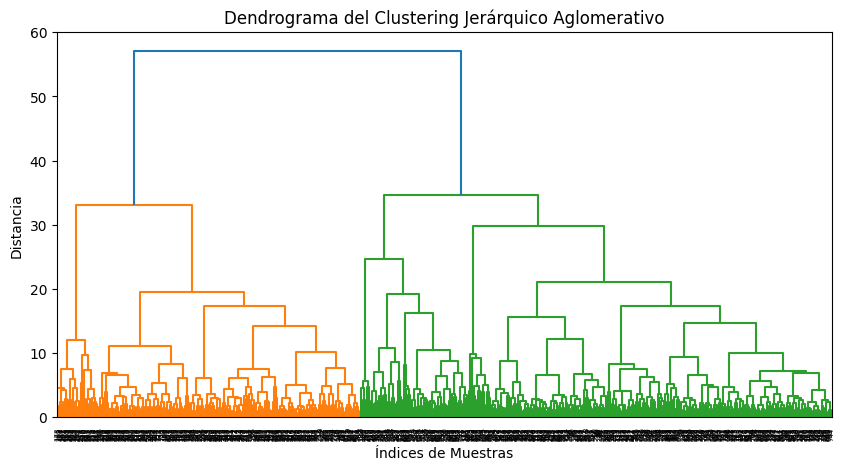

In [ ]:
### Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

modelo_hierarchical = AgglomerativeClustering(n_clusters = None, distance_threshold = 30)
modelo_hierarchical.fit(df_escalado)
print(len(np.unique(modelo_hierarchical.fit_predict(df_escalado))))
distances = linkage(df_escalado, method='ward')

# Dibuja el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(distances)
plt.title('Dendrograma del Clustering Jerárquico Aglomerativo')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia')
plt.show()